# NLP - Ex1

## A Tale of Two Cities by Charles Dickens

In [28]:
import urllib2
import math
import string
import operator

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter

### Get the book text

In [2]:
book = urllib2.urlopen('http://www.gutenberg.org/files/98/98-0.txt').read().decode('utf8').lower()

### Clean text that is not part of the book itself

In [3]:
start = 'it was the best of times,\r\nit was the worst of times,'
end = 'far better rest that i go to than i have ever known.'

book = (book[book.index(start):book.index(end) + 50]
        .replace('i. the period', '').replace('ii. the mail', '')
        .replace('iii. the night shadows', '').replace('iv. the preparation', '')
        .replace('v. the wine-shop', '').replace('vi. the shoemaker', '')
        .replace('i. five years later', '').replace('ii. a sight', '')
        .replace('iii. a disappointment', '').replace('iv. congratulatory', '')
        .replace('v. the jackal', '').replace('vi. hundreds of people', '')
        .replace('vii. monseigneur in town', '').replace('viii. monseigneur in the country', '')
        .replace("ix. the gorgon's head", '').replace('x. two promises', '')
        .replace('xi. a companion picture', '').replace('xii. the fellow of delicacy', '')
        .replace('xiii. the fellow of no delicacy', '').replace('xiv. the honest tradesman', '')
        .replace('xv. knitting', '').replace('xvi. still knitting', '')
        .replace('xvii. one night', '').replace('xviii. nine days', '')
        .replace('xix. an opinion', '').replace('xx. a plea', '')
        .replace('xxi. echoing footsteps', '').replace('xxii. the sea still rises', '')
        .replace('xxiii. fire rises', '').replace('xxiv. drawn to the loadstone rock', '')
        .replace('i. in secret', '').replace('ii. the grindstone', '')
        .replace('iii. the shadow', '').replace('iv. calm in storm', '')
        .replace('v. the wood-sawyer', '').replace('vi. triumph', '')
        .replace('vii. a knock at the door', '').replace('viii. a hand at cards', '')
        .replace('ix. the game made', '').replace('x. the substance of the shadow', '')
        .replace('xi. dusk', '').replace('xii. darkness', '').replace('xiii. fifty-two', '')
        .replace('xiv. the knitting done', '').replace('xv. the footsteps die out for ever', ''))

### Tokenize and remove stop words and punctuation

In [4]:
tokens = RegexpTokenizer(r'\w+').tokenize(book)
tokens = [token for token in tokens if token not in stopwords.words('english')]
histogram = Counter(tokens)

### Q4-A

In [32]:
total = 0.0
histogram = {}
for char in string.ascii_lowercase + ' ':
    count = book.count(char)
    total += count
    histogram[char] = count
histogram = sorted(histogram.items(), key=operator.itemgetter(1), reverse=True)
for key, value in histogram:
    print key, "{0:.2f}%".format(value / total * 100)

#TODO

  17.47%
e 10.31%
t 7.41%
a 6.66%
o 6.38%
n 5.84%
i 5.62%
h 5.43%
s 5.20%
r 5.09%
d 3.89%
l 3.05%
u 2.30%
m 2.11%
w 1.96%
c 1.87%
f 1.86%
g 1.71%
y 1.68%
p 1.34%
b 1.15%
v 0.71%
k 0.65%
q 0.09%
x 0.09%
j 0.09%
z 0.03%


### Q4-B

In [6]:
#TODO

### Q5-A

In [7]:
print 'number of tokens:', len(tokens)
print 'number of word types:', len(histogram)

number of tokens: 64079
number of word types: 9565


### Q5-B

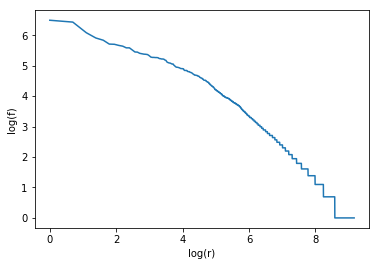

In [8]:
x_axis = []
y_axis = []
for rank, word in enumerate(histogram.most_common()):
    x_axis.append(math.log(rank + 1))
    y_axis.append(math.log(word[1]))
plt.plot(x_axis, y_axis)
plt.xlabel('log(r)')
plt.ylabel('log(f)')
plt.show()